In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import cluster
from sklearn import preprocessing

In [ ]:
#reading the dataset into code and displaying first 5 rows
path='/content/Data Task 2.xlsx'
df=pd.read_excel(path)
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [ ]:
#dropping rows with invalid values
df=df.dropna()
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,9,Mala,Lind,Female,97,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0


In [ ]:
#decribing dataset
df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,2780.000000,2780.000000,2780.000000
mean,1962.354317,49.449640,10.703957
std,1150.471372,28.765195,5.674807
min,1.000000,0.000000,1.000000
25%,966.750000,25.000000,6.000000
50%,1952.500000,49.000000,11.000000
75%,2951.250000,74.000000,16.000000
max,3997.000000,99.000000,22.000000


In [ ]:
#obtaining info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2780 entries, 0 to 3996
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          2780 non-null   int64  
 1   first_name                           2780 non-null   object 
 2   last_name                            2780 non-null   object 
 3   gender                               2780 non-null   object 
 4   past_3_years_bike_related_purchases  2780 non-null   int64  
 5   job_title                            2780 non-null   object 
 6   job_industry_category                2780 non-null   object 
 7   wealth_segment                       2780 non-null   object 
 8   deceased_indicator                   2780 non-null   object 
 9   owns_car                             2780 non-null   object 
 10  tenure                               2780 non-null   float64
dtypes: float64(1), int64(2), objec

In [ ]:
#dropping the columns which shouldn't be a part of clusters
to_drop=['customer_id','first_name','last_name','job_title','deceased_indicator','tenure']
df=df.drop(to_drop, axis=1)
df.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car
0,Female,93,Health,Mass Customer,Yes
1,Male,81,Financial Services,Mass Customer,Yes
2,Male,61,Property,Mass Customer,Yes
8,Female,97,Argiculture,Affluent Customer,Yes
9,Female,49,Financial Services,Mass Customer,Yes


In [ ]:
#encoding categorical variables for clustering 

gender_dummies=pd.get_dummies(df['gender'])
df['gender']=gender_dummies
df.head()

owns_car_dummies=pd.get_dummies(df['owns_car'])
df['owns_car']=owns_car_dummies
df.head()

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'job_industry_category'.
df['job_industry_category']= label_encoder.fit_transform(df['job_industry_category'])
  
df['job_industry_category'].unique()

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'wealth_segment'.
df['wealth_segment']= label_encoder.fit_transform(df['wealth_segment'])
  
df['wealth_segment'].unique()

df

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car
0,1,93,3,2,0
1,0,81,2,2,0
2,0,61,6,2,0
8,1,97,0,0,0
9,1,49,2,2,0
...,...,...,...,...,...
3992,1,6,1,2,1
3993,1,5,5,0,1
3994,0,93,5,2,0
3995,1,8,3,2,1


In [ ]:
#determining number of optimal clusters
k_range=range(1,11)
model_score=[]
for i in k_range:
  model=cluster.KMeans(i)                           #creating model
  model.fit_predict(df)                             #creating clusters
  model_score.append(model.inertia_)                #model.intertia_ for calculating error and appending to list
model_score

[2313627.639928058,
 589941.7966920328,
 277251.80817725806,
 159370.48130799847,
 108198.76589810147,
 79299.06629695348,
 61756.75331602346,
 50364.669152999166,
 42814.99143953943,
 37644.6562403781]

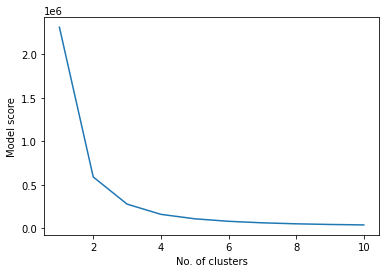

In [ ]:
#plotting the errors to determine elbow (optimal clusters)
plt.plot(k_range,model_score)
plt.xlabel('No. of clusters')
plt.ylabel('Model score')
plt.show()

**Optimal number of cluster=3**

In [ ]:
#the data is unstructured, so we don't have a target variable here
model= cluster.KMeans(3)
model_pred=model.fit_predict(df)
model_pred

array([0, 0, 2, ..., 0, 1, 0], dtype=int32)

In [ ]:
#inserting a column 'Group' with the the corresponding group number for each entry
df['Groups']=model_pred
df.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,Groups
0,1,93,3,2,0,0
1,0,81,2,2,0,0
2,0,61,6,2,0,2
8,1,97,0,0,0,0
9,1,49,2,2,0,2


In [ ]:
#printing all attributes of Ids which belong to group 1

group1= df[df['Groups']==1]
group1.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,Groups
25,1,12,2,2,0,1
27,0,5,3,0,0,1
30,1,3,8,1,0,1
31,1,17,5,0,1,1
38,0,5,1,2,1,1


In [ ]:
#printing all attributes of Ids which belong to group 0

group0= df[df['Groups']==0]
group0.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,Groups
0,1,93,3,2,0,0
1,0,81,2,2,0,0
8,1,97,0,0,0,0
13,1,85,2,0,1,0
14,0,91,5,2,1,0


In [ ]:
#printing all attributes of Ids which belong to group 2

group2= df[df['Groups']==2]
group2.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,Groups
2,0,61,6,2,0,2
9,1,49,2,2,0,2
11,0,58,5,2,1,2
12,0,38,2,1,0,2
23,1,55,0,2,0,2


In [ ]:
print(group0['past_3_years_bike_related_purchases'].mean())
print(group1['past_3_years_bike_related_purchases'].mean())
print(group2['past_3_years_bike_related_purchases'].mean())


81.96701030927835
15.61590909090909
47.54838709677419


**The mean of group 0 is the highest followed by group 1 and group 2. Therefore, people in group 0 purchase the most frequently on an average, followed by group 1 and group 2.**